C:\Users\DELL\AppData\Local\Temp\ipykernel_9056\3453882119.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  product  total_qty  revenue
0    Book          3    150.0
1  Eraser          8     24.0
2     Pen         10     50.0
3  Pencil         20     40.0


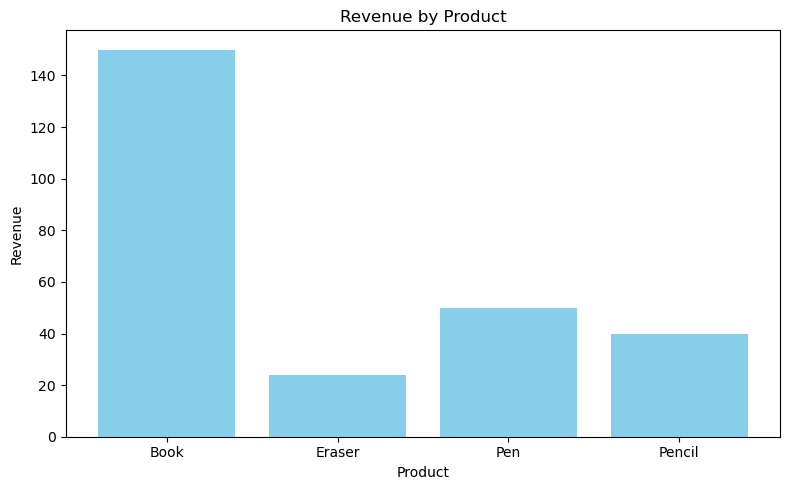

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MS SQL Server (your exact details)
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=DESKTOP-MMAOUL3\SQLEXPRESS;'
    r'DATABASE=sales_data;'
    r'Trusted_Connection=yes;'
)

# SQL Query
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Read to DataFrame
df = pd.read_sql(query, conn)
print(df)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
